Saving Normalized_GSE48350_expression_data.csv to Normalized_GSE48350_expression_data.csv


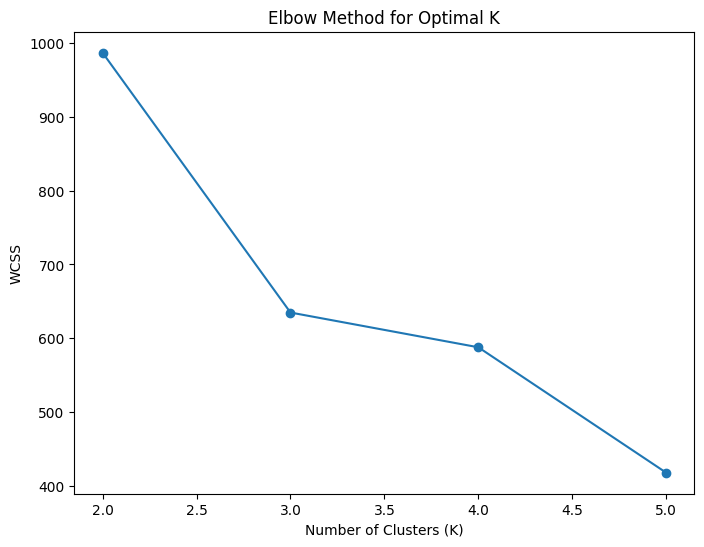

Optimal number of clusters (from elbow method): 3
Silhouette Score for K=3: 0.5531035844236213
Adjusted Rand Index for K=3: 1.0
Homogeneity Score for K=3: 1.0
Fowlkes-Mallows Index for K=3: 1.0
Adjusted Mutual Information Score for K=3: 1.0
Calinski-Harabasz Score for K=3: 44777.89964667481


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, fowlkes_mallows_score, adjusted_mutual_info_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import os

# Step 1: Load the normalized dataset from your folder
from google.colab import files
# Upload the file from your local system
uploaded = files.upload()
# After uploading, the file will be available in the current directory
import pandas as pd

# Read the uploaded file (assuming it's a CSV file)
data = pd.read_csv("Normalized_GSE48350_expression_data.csv")  # Make sure the file name matches the uploaded file


# Step 3: Apply PCA for dimensionality reduction (optional)
# Here, we reduce to 2 dimensions for better visualization and clustering
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Step 4: K-Means Clustering for different values of K (2, 3, 4, 5)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
ari_scores = []  # To store ARI scores for each k
homogeneity_scores = []  # To store Homogeneity Scores for each k
fmi_scores = []  # To store FMI scores for each k
ami_scores = []  # To store AMI scores for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k

# Iterate over the values of K (2 to 5)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Adjusted Rand Index
    ari_score = adjusted_rand_score(cluster_labels, cluster_labels)
    ari_scores.append(ari_score)

    # Homogeneity Score
    homogeneity = homogeneity_score(cluster_labels, cluster_labels)
    homogeneity_scores.append(homogeneity)

    # Fowlkes-Mallows Index
    fmi = fowlkes_mallows_score(cluster_labels, cluster_labels)
    fmi_scores.append(fmi)

    # Adjusted Mutual Information Score
    ami = adjusted_mutual_info_score(cluster_labels, cluster_labels)
    ami_scores.append(ami)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
# Let's assume the optimal K from the elbow plot is 3 (you can change it after observing the plot)
optimal_k = 3

# Step 7: Print the clustering evaluation metrics for the optimal K
print(f"Optimal number of clusters (from elbow method): {optimal_k}")

print(f"Silhouette Score for K={optimal_k}: {sil_scores[optimal_k - 2]}")
print(f"Adjusted Rand Index for K={optimal_k}: {ari_scores[optimal_k - 2]}")
print(f"Homogeneity Score for K={optimal_k}: {homogeneity_scores[optimal_k - 2]}")
print(f"Fowlkes-Mallows Index for K={optimal_k}: {fmi_scores[optimal_k - 2]}")
print(f"Adjusted Mutual Information Score for K={optimal_k}: {ami_scores[optimal_k - 2]}")
print(f"Calinski-Harabasz Score for K={optimal_k}: {calinski_scores[optimal_k - 2]}")



In [ ]:
import os
uploaded_files = os.listdir()
print(uploaded_files)

['.config', 'Normalized_GSE48350_expression_data.csv', 'sample_data']


In [ ]:
import pandas as pd
from google.colab import files
# Upload the file from your local system
uploaded = files.upload()
data = pd.read_csv("Normalized_GSE48350_expression_data.csv")

Saving Normalized_GSE48350_expression_data.csv to Normalized_GSE48350_expression_data.csv


In [ ]:
print(data.head())

   GSM300166  GSM300167  GSM300168  GSM300169  GSM300170  GSM300171  \
0   0.002616   0.002681   0.016084   0.065639   0.021698   0.002062   
1   0.001956   0.001647   0.018592   0.038473   0.016910   0.002127   
2   0.002531   0.001979   0.031043   0.084122   0.060540   0.019890   
3   0.002875   0.001957   0.009776   0.044584   0.012332   0.001113   
4   0.001434   0.000992   0.031870   0.056537   0.026075   0.005094   

   GSM300172  GSM300173  GSM300174  GSM300175  ...  GSM1176266  GSM1176267  \
0   0.002186   0.044214   0.005986   0.030500  ...    0.024060    0.001697   
1   0.001630   0.076526   0.006940   0.053487  ...    0.024442    0.001731   
2   0.003050   0.071739   0.012713   0.037420  ...    0.021751    0.004205   
3   0.001388   0.101766   0.007274   0.047536  ...    0.022918    0.002538   
4   0.003052   0.126643   0.039185   0.070481  ...    0.012927    0.001209   

   GSM1176268  GSM1176269  GSM1176270  GSM1176271  GSM1176272  GSM1176273  \
0    0.002635    0.035102  

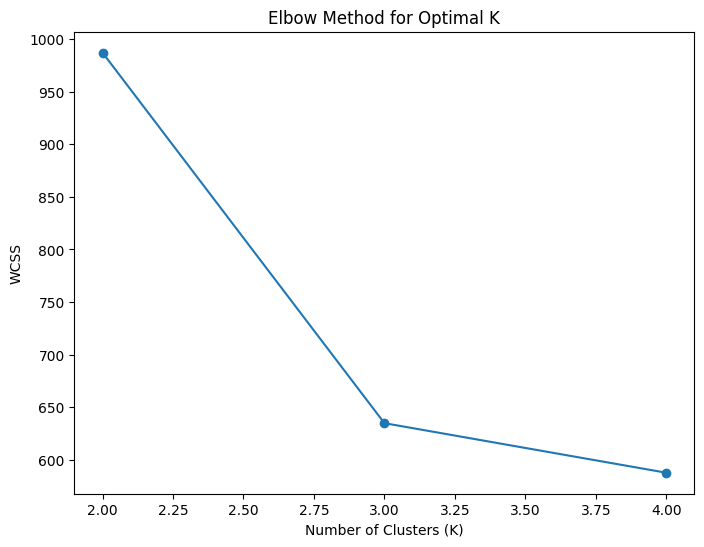


Evaluation metrics for K=2:
Silhouette Score: 0.529464153782623
Adjusted Rand Index: 1.0
Homogeneity Score: 1.0
Fowlkes-Mallows Index: 1.0
Adjusted Mutual Information Score: 1.0
Calinski-Harabasz Score: 38097.221088820355
Dunn Index: 0.0007162692792222546

Evaluation metrics for K=3:
Silhouette Score: 0.5531035844236213
Adjusted Rand Index: 1.0
Homogeneity Score: 1.0
Fowlkes-Mallows Index: 1.0
Adjusted Mutual Information Score: 1.0
Calinski-Harabasz Score: 44777.89964667481
Dunn Index: 0.00020287750065115434

Evaluation metrics for K=4:
Silhouette Score: 0.4345552910602671
Adjusted Rand Index: 1.0
Homogeneity Score: 1.0
Fowlkes-Mallows Index: 1.0
Adjusted Mutual Information Score: 1.0
Calinski-Harabasz Score: 33704.16495002251
Dunn Index: 0.0003782135959101957


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, fowlkes_mallows_score, adjusted_mutual_info_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Perform PCA (2 components)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Function to calculate the Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    # Reduce memory usage by subsampling
    sample_size = int(len(X) * sample_fraction)
    # Randomly sample data
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]  # Subset of data
    labels_sample = labels[sample_indices]  # Corresponding labels for the sampled data

    n_clusters = len(np.unique(labels_sample))

    # Calculate the pairwise distances between each point in the sample
    pairwise_distances = cdist(X_sample, X_sample)

    # Initialize the minimum inter-cluster distance and maximum intra-cluster distance
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(n_clusters):
        # Get the points belonging to the current cluster
        cluster_points = X_sample[labels_sample == i]

        # Calculate the diameter of the current cluster (maximum intra-cluster distance)
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in range(i + 1, n_clusters):
            # Get the points belonging to the other cluster
            other_cluster_points = X_sample[labels_sample == j]

            # Calculate the distance between the two clusters (minimum inter-cluster distance)
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Dunn Index: min inter-cluster distance / max intra-cluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist

# Step 4: K-Means Clustering for different values of K (2, 3, 4)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
ari_scores = []  # To store ARI scores for each k
homogeneity_scores = []  # To store Homogeneity Scores for each k
fmi_scores = []  # To store FMI scores for each k
ami_scores = []  # To store AMI scores for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k
dunn_scores = []  # To store Dunn Index for each k

# Iterate over the values of K (2 to 4)
for k in range(2, 5):  # Only for k = 2, 3, 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Adjusted Rand Index
    ari_score = adjusted_rand_score(cluster_labels, cluster_labels)
    ari_scores.append(ari_score)

    # Homogeneity Score
    homogeneity = homogeneity_score(cluster_labels, cluster_labels)
    homogeneity_scores.append(homogeneity)

    # Fowlkes-Mallows Index
    fmi = fowlkes_mallows_score(cluster_labels, cluster_labels)
    fmi_scores.append(fmi)

    # Adjusted Mutual Information Score
    ami = adjusted_mutual_info_score(cluster_labels, cluster_labels)
    ami_scores.append(ami)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

    # Dunn Index (with downsampling to avoid memory crash)
    dunn_idx = dunn_index(data_pca, cluster_labels, sample_fraction=0.1)  # 10% sample
    dunn_scores.append(dunn_idx)

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 5), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
optimal_k = 3  # Change this after observing the elbow plot

# Step 7: Print the clustering evaluation metrics for the values K = 2, 3, and 4
for k in range(2, 5):  # For K=2, K=3, and K=4
    print(f"\nEvaluation metrics for K={k}:")
    print(f"Silhouette Score: {sil_scores[k - 2]}")
    print(f"Adjusted Rand Index: {ari_scores[k - 2]}")
    print(f"Homogeneity Score: {homogeneity_scores[k - 2]}")
    print(f"Fowlkes-Mallows Index: {fmi_scores[k - 2]}")
    print(f"Adjusted Mutual Information Score: {ami_scores[k - 2]}")
    print(f"Calinski-Harabasz Score: {calinski_scores[k - 2]}")
    print(f"Dunn Index: {dunn_scores[k - 2]}")


   GSM300166  GSM300167  GSM300168  GSM300169  GSM300170  GSM300171  \
0   0.002616   0.002681   0.016084   0.065639   0.021698   0.002062   
1   0.001956   0.001647   0.018592   0.038473   0.016910   0.002127   
2   0.002531   0.001979   0.031043   0.084122   0.060540   0.019890   
3   0.002875   0.001957   0.009776   0.044584   0.012332   0.001113   
4   0.001434   0.000992   0.031870   0.056537   0.026075   0.005094   

   GSM300172  GSM300173  GSM300174  GSM300175  ...  GSM1176266  GSM1176267  \
0   0.002186   0.044214   0.005986   0.030500  ...    0.024060    0.001697   
1   0.001630   0.076526   0.006940   0.053487  ...    0.024442    0.001731   
2   0.003050   0.071739   0.012713   0.037420  ...    0.021751    0.004205   
3   0.001388   0.101766   0.007274   0.047536  ...    0.022918    0.002538   
4   0.003052   0.126643   0.039185   0.070481  ...    0.012927    0.001209   

   GSM1176268  GSM1176269  GSM1176270  GSM1176271  GSM1176272  GSM1176273  \
0    0.002635    0.035102  

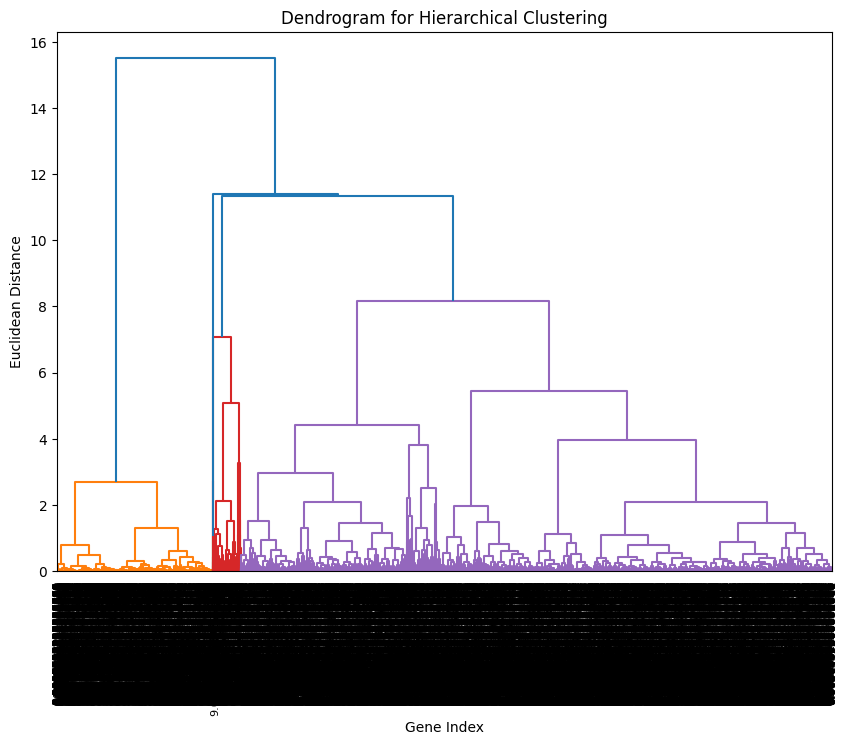

Clustering resulted in only one cluster. Please adjust 'max_d' or other parameters to generate more clusters.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to find the closest gene to each cluster center
def find_closest_gene(center, data_points, gene_ids):
    distances = np.linalg.norm(data_points - center, axis=1)
    closest_index = np.argmin(distances)
    return gene_ids.iloc[closest_index], data_points[closest_index]

# Load the dataset (make sure it's already uploaded in Colab)
data = pd.read_csv("Normalized_GSE48350_expression_data.csv")  # Replace if necessary

# Check the first few rows and columns of the data to determine the structure
print(data.head())  # Print first few rows to understand structure

# Assuming the first column (index) contains the gene names (row indices), we'll set it accordingly
gene_names = data.iloc[:, 0]  # Use the first column for gene names (adjust if necessary)

# Store the original data
original_data = data.copy()

# Prepare data for clustering: Drop non-numeric columns (i.e., gene names in the first column)
features = data.drop(columns=[data.columns[0]])  # Drop the first column which contains gene names

# Shuffle the data to ensure randomness and reduce data size by selecting a subset of rows
features, gene_names = shuffle(features, gene_names, random_state=42)
features = features.head(10000)  # Reduce to first 10,000 rows for memory efficiency
gene_names = gene_names.head(10000)

# Apply PCA for dimensionality reduction (you can adjust n_components as needed)
pca = PCA(n_components=5)  # Reduce to 5 dimensions to save memory
features_pca = pca.fit_transform(features)

# Perform hierarchical clustering using 'ward' linkage method
Z = linkage(features_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Gene Index')
plt.ylabel('Euclidean Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=gene_names.values)
plt.show()

# Define the number of clusters based on the dendrogram
max_d = 50  # Adjust this value based on where you want to cut the dendrogram
cluster_labels = fcluster(Z, max_d, criterion='distance')

# Check if the number of clusters is greater than 1
if len(np.unique(cluster_labels)) > 1:
    # Add the cluster labels to the **subset** of the reduced data (10,000 rows)
    features['Cluster'] = cluster_labels

    # Save the clustered genes to a CSV file (only the subset)
    output_file = '/content/hierarchical_clustering_result.csv'  # Save to the current directory in Colab
    features['Gene_ID'] = gene_names  # Add the gene names for reference
    features.to_csv(output_file, index=False)

    print(f"Hierarchical clustering result saved to '{output_file}'.")

    # Optional: Visualize clusters if necessary
    plt.figure(figsize=(8, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.title('Hierarchical Clustering (PCA Reduced Data)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Step 5: Calculate clustering evaluation metrics for hierarchical clustering
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)

    # Function to calculate Dunn Index (with downsampling for large datasets)
    def dunn_index(X, labels, sample_fraction=0.1):
        sample_size = int(len(X) * sample_fraction)
        sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
        X_sample = X[sample_indices]
        labels_sample = labels[sample_indices]

        n_clusters = len(np.unique(labels_sample))
        pairwise_distances = cdist(X_sample, X_sample)

        min_inter_cluster_dist = np.inf
        max_intra_cluster_dist = -np.inf

        for i in range(n_clusters):
            cluster_points = X_sample[labels_sample == i]
            intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

            for j in range(i + 1, n_clusters):
                other_cluster_points = X_sample[labels_sample == j]
                inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
                min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

        return min_inter_cluster_dist / max_intra_cluster_dist

    # Calculate Dunn Index for the clustering
    dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering evaluation metrics
    print(f"\nEvaluation Metrics for Hierarchical Clustering:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
    print(f"Dunn Index: {dunn_idx}")

else:
    print("Clustering resulted in only one cluster. Please adjust 'max_d' or other parameters to generate more clusters.")


   GSM300166  GSM300167  GSM300168  GSM300169  GSM300170  GSM300171  \
0   0.002616   0.002681   0.016084   0.065639   0.021698   0.002062   
1   0.001956   0.001647   0.018592   0.038473   0.016910   0.002127   
2   0.002531   0.001979   0.031043   0.084122   0.060540   0.019890   
3   0.002875   0.001957   0.009776   0.044584   0.012332   0.001113   
4   0.001434   0.000992   0.031870   0.056537   0.026075   0.005094   

   GSM300172  GSM300173  GSM300174  GSM300175  ...  GSM1176266  GSM1176267  \
0   0.002186   0.044214   0.005986   0.030500  ...    0.024060    0.001697   
1   0.001630   0.076526   0.006940   0.053487  ...    0.024442    0.001731   
2   0.003050   0.071739   0.012713   0.037420  ...    0.021751    0.004205   
3   0.001388   0.101766   0.007274   0.047536  ...    0.022918    0.002538   
4   0.003052   0.126643   0.039185   0.070481  ...    0.012927    0.001209   

   GSM1176268  GSM1176269  GSM1176270  GSM1176271  GSM1176272  GSM1176273  \
0    0.002635    0.035102  

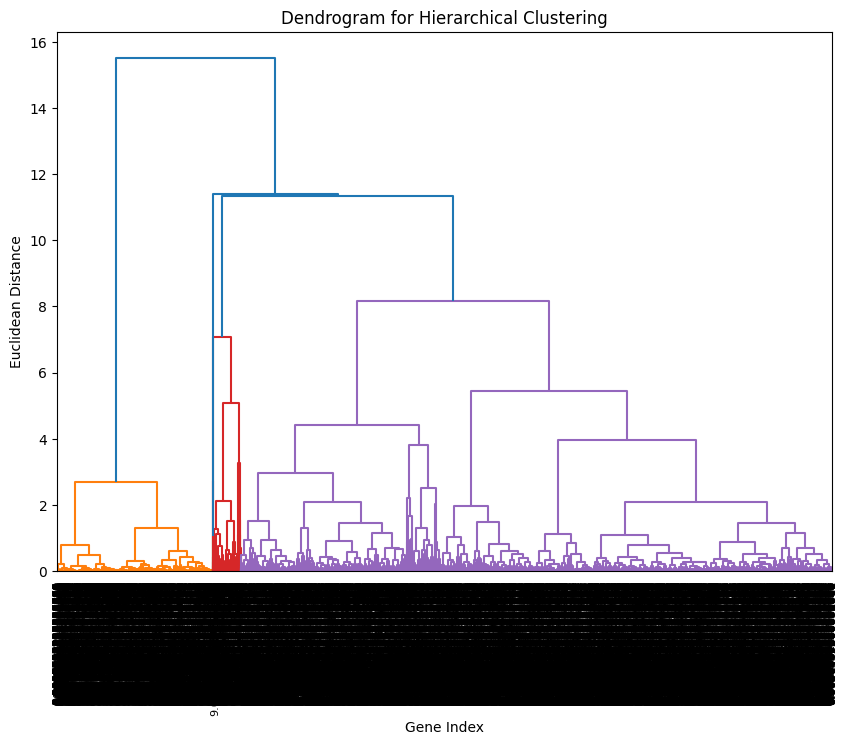

Number of unique clusters formed: 1
Cluster distribution: [    0 10000]
Clustering resulted in only one cluster. Please adjust 'max_d' or other parameters to generate more clusters.
Cluster labels: [1 1 1 ... 1 1 1]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to find the closest gene to each cluster center
def find_closest_gene(center, data_points, gene_ids):
    distances = np.linalg.norm(data_points - center, axis=1)
    closest_index = np.argmin(distances)
    return gene_ids.iloc[closest_index], data_points[closest_index]

# Load the dataset (make sure it's already uploaded in Colab)
data = pd.read_csv("Normalized_GSE48350_expression_data.csv")  # Replace if necessary

# Check the first few rows and columns of the data to determine the structure
print(data.head())  # Print first few rows to understand structure

# Assuming the first column (index) contains the gene names (row indices), we'll set it accordingly
gene_names = data.iloc[:, 0]  # Use the first column for gene names (adjust if necessary)

# Store the original data
original_data = data.copy()

# Prepare data for clustering: Drop non-numeric columns (i.e., gene names in the first column)
features = data.drop(columns=[data.columns[0]])  # Drop the first column which contains gene names

# Shuffle the data to ensure randomness and reduce data size by selecting a subset of rows
features, gene_names = shuffle(features, gene_names, random_state=42)
features = features.head(10000)  # Reduce to first 10,000 rows for memory efficiency
gene_names = gene_names.head(10000)

# Apply PCA for dimensionality reduction (you can adjust n_components as needed)
pca = PCA(n_components=5)  # Reduce to 5 dimensions to save memory
features_pca = pca.fit_transform(features)

# Perform hierarchical clustering using 'ward' linkage method
Z = linkage(features_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Gene Index')
plt.ylabel('Euclidean Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=gene_names.values)
plt.show()

# Define the number of clusters based on the dendrogram
max_d = 50  # Adjust this value based on where you want to cut the dendrogram
cluster_labels = fcluster(Z, max_d, criterion='distance')

# Print the number of unique clusters and their distribution
unique_clusters = np.unique(cluster_labels)
print(f"Number of unique clusters formed: {len(unique_clusters)}")
print(f"Cluster distribution: {np.bincount(cluster_labels)}")

# Only proceed with evaluation metrics if there are multiple clusters
if len(unique_clusters) > 1:
    # Add the cluster labels to the **subset** of the reduced data (10,000 rows)
    features['Cluster'] = cluster_labels

    # Save the clustered genes to a CSV file (only the subset)
    output_file = '/content/hierarchical_clustering_result.csv'  # Save to the current directory in Colab
    features['Gene_ID'] = gene_names  # Add the gene names for reference
    features.to_csv(output_file, index=False)

    print(f"Hierarchical clustering result saved to '{output_file}'.")

    # Optional: Visualize clusters if necessary
    plt.figure(figsize=(8, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.title('Hierarchical Clustering (PCA Reduced Data)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Step 5: Calculate clustering evaluation metrics for hierarchical clustering
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)

    # Function to calculate Dunn Index (with downsampling for large datasets)
    def dunn_index(X, labels, sample_fraction=0.1):
        sample_size = int(len(X) * sample_fraction)
        sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
        X_sample = X[sample_indices]
        labels_sample = labels[sample_indices]

        n_clusters = len(np.unique(labels_sample))
        pairwise_distances = cdist(X_sample, X_sample)

        min_inter_cluster_dist = np.inf
        max_intra_cluster_dist = -np.inf

        for i in range(n_clusters):
            cluster_points = X_sample[labels_sample == i]
            intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

            for j in range(i + 1, n_clusters):
                other_cluster_points = X_sample[labels_sample == j]
                inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
                min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

        return min_inter_cluster_dist / max_intra_cluster_dist

    # Calculate Dunn Index for the clustering
    dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering evaluation metrics
    print(f"\nEvaluation Metrics for Hierarchical Clustering:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
    print(f"Dunn Index: {dunn_idx}")

else:
    print("Clustering resulted in only one cluster. Please adjust 'max_d' or other parameters to generate more clusters.")
    print(f"Cluster labels: {cluster_labels}")  # Print the cluster labels even if only one cluster exists


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# Function to find the closest gene to each cluster center
def find_closest_gene(center, data_points, gene_ids):
    distances = np.linalg.norm(data_points - center, axis=1)
    closest_index = np.argmin(distances)
    return gene_ids.iloc[closest_index], data_points[closest_index]

# Function to calculate Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    n_samples = len(X)

    # Ensure sufficient sample size (avoid empty or too small subsets)
    sample_size = max(int(n_samples * sample_fraction), 2)  # At least 2 samples
    sample_indices = np.random.choice(n_samples, sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    # Filter out noise points (-1)
    unique_labels = np.unique(labels_sample)
    unique_labels = unique_labels[unique_labels != -1]  # Remove noise label (-1)

    if len(unique_labels) < 2:
        return None  # Not enough clusters for Dunn Index calculation

    # Compute pairwise distances
    pairwise_distances = cdist(X_sample, X_sample)

    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    # Iterate over all clusters and calculate distances
    for i in unique_labels:
        cluster_points = X_sample[labels_sample == i]
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in unique_labels:
            if i >= j:  # Avoid duplicate comparisons
                continue
            other_cluster_points = X_sample[labels_sample == j]
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Ensure no division by zero or invalid calculations
    if max_intra_cluster_dist > 0:
        return min_inter_cluster_dist / max_intra_cluster_dist
    return None


# Load the dataset (assuming it's already loaded as `data`)
# Assuming the first column (index) contains the gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns (i.e., gene names in the first column)
features = data.drop(columns=[data.columns[0]])

# Standardize the data (important for clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into smaller chunks for downsampling while maintaining all rows
chunk_size = 10000  # You can adjust based on memory
num_chunks = len(features) // chunk_size
if len(features) % chunk_size != 0:
    num_chunks += 1

# Perform PCA for dimensionality reduction
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features_scaled)

# Initialize the list to store evaluation results
silhouette_scores = []
calinski_scores = []
dunn_indexes = []

# Iterate through the dataset in chunks to downsample gradually
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(features))  # Handle remaining rows

    # Take a chunk of the data
    chunk_features = features_pca[start_idx:end_idx]
    chunk_gene_names = gene_names[start_idx:end_idx]

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on the dataset
    cluster_labels = dbscan.fit_predict(chunk_features)

    # Calculate the number of unique clusters and their distribution
    unique_clusters = np.unique(cluster_labels)
    print(f"Number of unique clusters formed (including noise) in chunk {i + 1}: {len(unique_clusters)}")

    # Exclude noise points (-1) when calculating cluster distribution
    cluster_labels_no_noise = cluster_labels[cluster_labels != -1]
    if len(cluster_labels_no_noise) > 0:
        cluster_distribution = np.bincount(cluster_labels_no_noise)
    else:
        cluster_distribution = np.array([])

    print(f"Cluster distribution (excluding noise) in chunk {i + 1}: {cluster_distribution}")

    # Store evaluation metrics if there are more than one cluster (i.e., not just noise)
    if len(unique_clusters) > 1:
        try:
            sil_score = silhouette_score(chunk_features, cluster_labels)
        except ValueError:  # In case silhouette score cannot be computed
            sil_score = None

        calinski_score = calinski_harabasz_score(chunk_features, cluster_labels)

        # Calculate Dunn Index for the clustering
        dunn_idx = dunn_index(chunk_features, cluster_labels, sample_fraction=0.1)

        # Append the results
        silhouette_scores.append(sil_score)
        calinski_scores.append(calinski_score)
        dunn_indexes.append(dunn_idx)

# Filter out None values before calculating the mean
silhouette_scores_filtered = [score for score in silhouette_scores if score is not None]
calinski_scores_filtered = [score for score in calinski_scores if score is not None]
dunn_indexes_filtered = [score for score in dunn_indexes if score is not None]

# Aggregate the results for all chunks
final_sil_score = np.nanmean(silhouette_scores_filtered) if silhouette_scores_filtered else None
final_calinski_score = np.mean(calinski_scores_filtered) if calinski_scores_filtered else None
final_dunn_index = np.mean(dunn_indexes_filtered) if dunn_indexes_filtered else None

# Print the final results
print(f"\nFinal Evaluation Metrics for DBSCAN Clustering:")
print(f"Silhouette Score (average across chunks): {final_sil_score}")
print(f"Calinski-Harabasz Score (average across chunks): {final_calinski_score}")
print(f"Dunn Index (average across chunks): {final_dunn_index}")


Number of unique clusters formed (including noise) in chunk 1: 28
Cluster distribution (excluding noise) in chunk 1: [6179    8    7    5    8    7    5    5    7    6    9    5    8    8
    8    5    7    5    5    5    9    5    4    5    5    6    5]
Number of unique clusters formed (including noise) in chunk 2: 33
Cluster distribution (excluding noise) in chunk 2: [3420    8 1306   11    9    6   17   13    8    5    5    3    5   11
    7    9    5    5    6    4    5    5    5    5    8    5    5    4
    5    5    2    5]
Number of unique clusters formed (including noise) in chunk 3: 32
Cluster distribution (excluding noise) in chunk 3: [5277    9    6    6    5    5   10    8    4    4    5    6    4    5
    5    8    5    3    8    5    4    6    4    6    9    3    5    5
    5    5    5]
Number of unique clusters formed (including noise) in chunk 4: 46
Cluster distribution (excluding noise) in chunk 4: [3681 1228    4    6   10   15    4    5    4    8    4   10    5    6


Divisive hierarchical clustering result saved to 'divisive_clustering_result.csv'.

Evaluation Metrics for Divisive Clustering:
Silhouette Score: 0.44883099589655073
Calinski-Harabasz Score: 1569.166134800738
Dunn Index: 0.004839473879510127


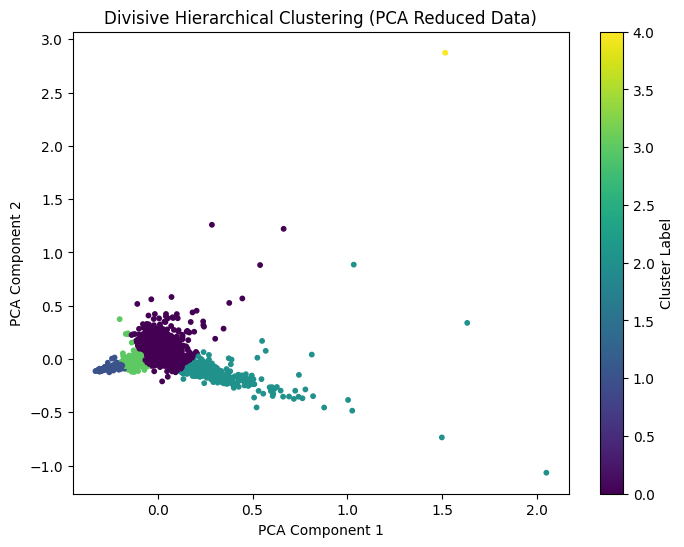

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to calculate Dunn Index (optimized)
def dunn_index(X, labels, sample_fraction=0.1):
    """
    Calculate the Dunn Index for clustering results (optimized for large datasets).

    Parameters:
    - X: Input data (numpy array).
    - labels: Cluster labels for each data point.
    - sample_fraction: Fraction of data to sample for Dunn Index calculation.

    Returns:
    - Dunn Index value.
    """
    # Sample the data to reduce computational overhead
    sample_size = int(len(X) * sample_fraction)
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    unique_labels = np.unique(labels_sample)
    n_clusters = len(unique_labels)

    if n_clusters < 2:
        raise ValueError("Dunn Index requires at least two clusters.")

    # Compute pairwise distances for the sampled data
    pairwise_distances = cdist(X_sample, X_sample)

    # Calculate inter-cluster distances
    inter_cluster_distances = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X_sample[labels_sample == unique_labels[i]]
            cluster_j = X_sample[labels_sample == unique_labels[j]]
            distances = cdist(cluster_i, cluster_j)
            inter_cluster_distances = min(inter_cluster_distances, np.min(distances))

    # Calculate intra-cluster distances
    intra_cluster_distances = 0
    for i in range(n_clusters):
        cluster_i = X_sample[labels_sample == unique_labels[i]]
        distances = cdist(cluster_i, cluster_i)
        intra_cluster_distances = max(intra_cluster_distances, np.max(distances))

    return inter_cluster_distances / intra_cluster_distances

# Function to perform divisive hierarchical clustering
def divisive_clustering(X, max_clusters=5, min_cluster_size=10):
    """
    Perform divisive hierarchical clustering using k-means as the splitting method.

    Parameters:
    - X: Input data (numpy array).
    - max_clusters: Maximum number of clusters to create.
    - min_cluster_size: Minimum size of a cluster to continue splitting.

    Returns:
    - cluster_labels: Final cluster labels for each data point.
    """
    n_samples = X.shape[0]
    cluster_labels = np.zeros(n_samples, dtype=int)  # Start with all points in one cluster
    cluster_id = 0  # Current cluster ID
    clusters_to_split = [np.arange(n_samples)]  # Indices of data points in each cluster

    while len(clusters_to_split) > 0 and cluster_id < max_clusters - 1:
        current_cluster_indices = clusters_to_split.pop(0)  # Get the next cluster to split
        if len(current_cluster_indices) < min_cluster_size:
            continue  # Skip small clusters

        current_data = X[current_cluster_indices]

        # Split the cluster using k-means with k=2
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(current_data)

        # Create new cluster IDs
        cluster_labels[current_cluster_indices[split_labels == 1]] = cluster_id + 1

        # Add new clusters to the list for further splitting
        clusters_to_split.append(current_cluster_indices[split_labels == 0])
        clusters_to_split.append(current_cluster_indices[split_labels == 1])

        cluster_id += 1  # Increment cluster ID

    return cluster_labels


# Assuming the first column contains gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns
features = data.drop(columns=[data.columns[0]])  # Drop the first column (gene names)

# Limit the data size to reduce memory usage
features = features.sample(n=5000, random_state=42)  # Reduce to 5000 rows
gene_names = gene_names.loc[features.index]  # Match the reduced indices

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components for efficiency
features_pca = pca.fit_transform(features)

# Perform divisive hierarchical clustering
cluster_labels = divisive_clustering(features_pca, max_clusters=5, min_cluster_size=10)

# Add cluster labels to the features
features['Cluster'] = cluster_labels
features['Gene_ID'] = gene_names  # Add gene names for reference

# Save results
output_file = 'divisive_clustering_result.csv'
features.to_csv(output_file, index=False)
print(f"Divisive hierarchical clustering result saved to '{output_file}'.")

# Calculate clustering metrics if there are multiple clusters
num_clusters = len(np.unique(cluster_labels))
if num_clusters > 1:
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)
    dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering metrics
    print(f"\nEvaluation Metrics for Divisive Clustering:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
    print(f"Dunn Index: {dunn_idx}")
else:
    print(f"Only {num_clusters} cluster(s) found. Metrics cannot be computed.")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('Divisive Hierarchical Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


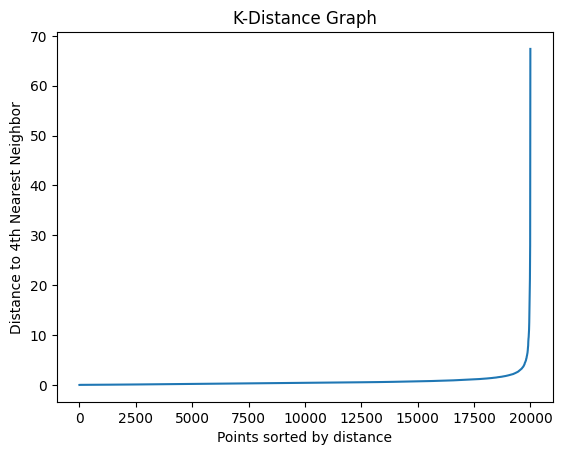

Optimal eps for chunk 1: 1.903927755800827
Number of unique clusters formed (including noise) in chunk 1: 7
Cluster distribution (excluding noise) in chunk 1: [19098    13     5     8     6    15]


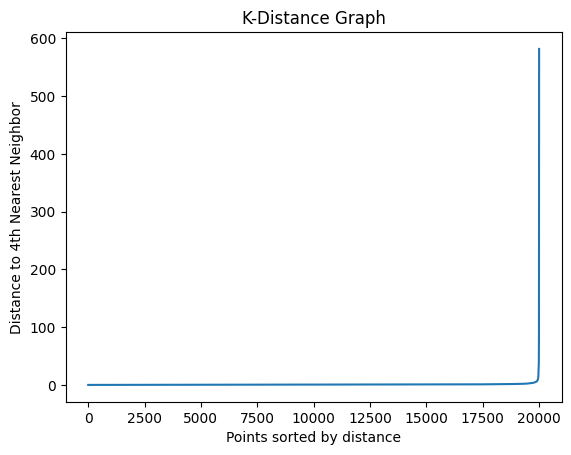

Optimal eps for chunk 2: 1.7076717069315153
Number of unique clusters formed (including noise) in chunk 2: 7
Cluster distribution (excluding noise) in chunk 2: [19124    10     7     5     5     5]


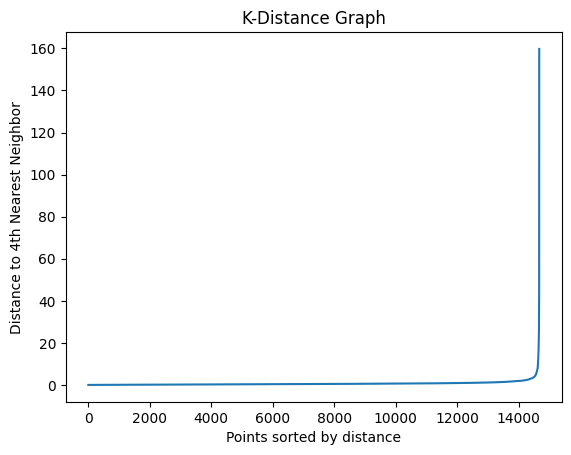

Optimal eps for chunk 3: 1.7732895936067834
Number of unique clusters formed (including noise) in chunk 3: 6
Cluster distribution (excluding noise) in chunk 3: [14025     6    11     5     4]

Final Evaluation Metrics for DBSCAN Clustering:
Silhouette Score (average across chunks): 0.20617987856000475
Calinski-Harabasz Score (average across chunks): 246.9760228327722
Dunn Index (average across chunks): 0.07587282518917239


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Function to find the closest gene to each cluster center
def find_closest_gene(center, data_points, gene_ids):
    distances = np.linalg.norm(data_points - center, axis=1)
    closest_index = np.argmin(distances)
    return gene_ids.iloc[closest_index], data_points[closest_index]

# Function to calculate Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    n_samples = len(X)

    # Ensure sufficient sample size (avoid empty or too small subsets)
    sample_size = max(int(n_samples * sample_fraction), 2)  # At least 2 samples
    sample_indices = np.random.choice(n_samples, sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    # Filter out noise points (-1)
    unique_labels = np.unique(labels_sample)
    unique_labels = unique_labels[unique_labels != -1]  # Remove noise label (-1)

    if len(unique_labels) < 2:
        return None  # Not enough clusters for Dunn Index calculation

    # Compute pairwise distances
    pairwise_distances = cdist(X_sample, X_sample)

    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    # Iterate over all clusters and calculate distances
    for i in unique_labels:
        cluster_points = X_sample[labels_sample == i]
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in unique_labels:
            if i >= j:  # Avoid duplicate comparisons
                continue
            other_cluster_points = X_sample[labels_sample == j]
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Ensure no division by zero or invalid calculations
    if max_intra_cluster_dist > 0:
        return min_inter_cluster_dist / max_intra_cluster_dist
    return None


# Load the dataset (assuming it's already loaded as `data`)
# Assuming the first column (index) contains the gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns (i.e., gene names in the first column)
features = data.drop(columns=[data.columns[0]])

# Standardize the data (important for clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into smaller chunks for downsampling while maintaining all rows
chunk_size = 20000  # You can adjust based on memory
num_chunks = len(features) // chunk_size
if len(features) % chunk_size != 0:
    num_chunks += 1

# Perform PCA for dimensionality reduction
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features_scaled)

# Initialize the list to store evaluation results
silhouette_scores = []
calinski_scores = []
dunn_indexes = []

# Function to find an optimal eps using k-distance graph
def optimal_eps(X):
    # Use NearestNeighbors to calculate the distances to the k-th nearest neighbor
    neigh = NearestNeighbors(n_neighbors=4)
    neigh.fit(X)
    distances, indices = neigh.kneighbors(X)

    # Sort the distances in ascending order
    distances = np.sort(distances[:, 3], axis=0)

    # Plot the k-distance graph to visually determine the optimal eps
    plt.plot(distances)
    plt.ylabel('Distance to 4th Nearest Neighbor')
    plt.xlabel('Points sorted by distance')
    plt.title('K-Distance Graph')
    plt.show()

    # You can use a heuristic approach or visual inspection to select eps.
    return distances[int(len(distances) * 0.95)]  # 95th percentile as a heuristic

# Iterate through the dataset in chunks to downsample gradually
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(features))  # Handle remaining rows

    # Take a chunk of the data
    chunk_features = features_pca[start_idx:end_idx]
    chunk_gene_names = gene_names[start_idx:end_idx]

    # Find optimal eps for DBSCAN based on k-distance graph
    eps = optimal_eps(chunk_features)
    print(f"Optimal eps for chunk {i + 1}: {eps}")

    # Apply DBSCAN clustering with the optimized eps
    dbscan = DBSCAN(eps=eps, min_samples=5)  # You can also tune min_samples
    cluster_labels = dbscan.fit_predict(chunk_features)

    # Calculate the number of unique clusters and their distribution
    unique_clusters = np.unique(cluster_labels)
    print(f"Number of unique clusters formed (including noise) in chunk {i + 1}: {len(unique_clusters)}")

    # Exclude noise points (-1) when calculating cluster distribution
    cluster_labels_no_noise = cluster_labels[cluster_labels != -1]
    if len(cluster_labels_no_noise) > 0:
        cluster_distribution = np.bincount(cluster_labels_no_noise)
    else:
        cluster_distribution = np.array([])

    print(f"Cluster distribution (excluding noise) in chunk {i + 1}: {cluster_distribution}")

    # Store evaluation metrics if there are more than one cluster (i.e., not just noise)
    if len(unique_clusters) > 1:
        try:
            sil_score = silhouette_score(chunk_features, cluster_labels)
        except ValueError:  # In case silhouette score cannot be computed
            sil_score = None

        calinski_score = calinski_harabasz_score(chunk_features, cluster_labels)

        # Calculate Dunn Index for the clustering
        dunn_idx = dunn_index(chunk_features, cluster_labels, sample_fraction=0.1)

        # Append the results
        silhouette_scores.append(sil_score)
        calinski_scores.append(calinski_score)
        dunn_indexes.append(dunn_idx)

# Filter out None values before calculating the mean
silhouette_scores_filtered = [score for score in silhouette_scores if score is not None]
calinski_scores_filtered = [score for score in calinski_scores if score is not None]
dunn_indexes_filtered = [score for score in dunn_indexes if score is not None]

# Aggregate the results for all chunks
final_sil_score = np.nanmean(silhouette_scores_filtered) if silhouette_scores_filtered else None
final_calinski_score = np.mean(calinski_scores_filtered) if calinski_scores_filtered else None
final_dunn_index = np.mean(dunn_indexes_filtered) if dunn_indexes_filtered else None

# Print the final results
print(f"\nFinal Evaluation Metrics for DBSCAN Clustering:")
print(f"Silhouette Score (average across chunks): {final_sil_score}")
print(f"Calinski-Harabasz Score (average across chunks): {final_calinski_score}")
print(f"Dunn Index (average across chunks): {final_dunn_index}")
